In [2]:
import h5py

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt


In [5]:
cd /home/siyan/projects/cluster

/home/siyan/projects/cluster


# open h5py file

In [11]:
with h5py.File('data/cremi/images/im_A_v2_200.h5','r') as f:
    img_A = f['main'][:]

In [12]:
with h5py.File('data/cremi/gt-syn/syn_A_v2_200.h5','r') as f:
    mask_A = f['main'][:]

In [29]:
img_A.shape

(153, 1842, 1727)

In [30]:
mask_A.shape

(153, 1842, 1727)

# Keys

### Volumes

The volumes are stored in row-major format, i.e., with dimensions (depth,height,width). All volumes have an attribute resolution that specifies the size of voxels (depth,height,width) in nm. In the padded versions of the datasets, the raw volume provides much more context. In this case, the label volumes have an additional offset attribute (z,y,x) in nm that marks the beginning of the label volumes in the raw volume.

- volumes/raw
    gray scale pixels
- volumes/labels/clefts
    synaptic cleft segmentation
- volumes/labels/neuron_ids
    neuron segmentation

### Annotations

Annotations for pre- and post-synaptic partner pairs are provided as well. All locations are given as (z,y,x) in nm. In the padded versions of the datasets, the raw volume provides much more context. In this case, the annotation group has an additional offset attribute (z,y,x) in nm, which is the same as for the label volumes. All locations are relative to this offset, such that they are the same as in the unpadded version.

- annotations/ids
    list of ids
- annotations/locations
    list of annotation locations as (z,y,x) in nm, same order as ids
- annotations/type???
    list of annotation types (presynaptic_site or postsynaptic_site), same order as ids
- presynaptic_site/partners
    list of id tuples (pre, post) linking pre- and postsynaptic partners
- comments/target_ids
    list of ids for annotations that have a comment
- comments/comments
    list of comments, same order as target_ids 

# public dataset

### see the figures!

In [6]:
with h5py.File('data/public/sample_A_padded_20160501.hdf','r') as f:
    rawA = f['volumes/raw'][:]
    cleftsA = f['volumes/labels/clefts'][:]
    neuronidA = f['volumes/labels/neuron_ids'][:]

In [8]:
np.unique(neuronidA[0])

array([   885,    886,    894,    951,    976,   1011,   1039,   1052,
         1067,   1071,   1079,   1083,   1087,   1167,   1172,   1181,
         1206,   1209,   1253,   1283,   1322,   1377,   1403,   1458,
         1461,   1540,   1594,   1644,   1650,   1666,   1678,   1765,
         1788,   1913,   1996,   2047,   2064,   2069,   2120,   2150,
         2163,   2170,   2193,   2298,   2441,   2500,   2558,   2640,
         2662,   2680,   2703,   2909,   2926,   2982,   3072,   3307,
         3391,   3439,   3445,   3472,   3487,   3575,   3803,   3819,
         3865,   3925,   4077,   4115,   4143,   4179,   4208,   4252,
         4357,   4363,   4393,   4447,   4468,   4557,   4688,   4755,
         4791,   4797,   4844,   4887,   4903,   4909,   4934,   4944,
         5079,   5092,   5112,   5171,   5234,   5395,   5424,   5556,
         5700,   5710,   5712,   5717,   5783,   5820,   5892,   5918,
         5986,   6036,   6101,   6136,   6155,   6252,   6315,   6429,
      

In [16]:
rawA.shape

(200, 3072, 3072)

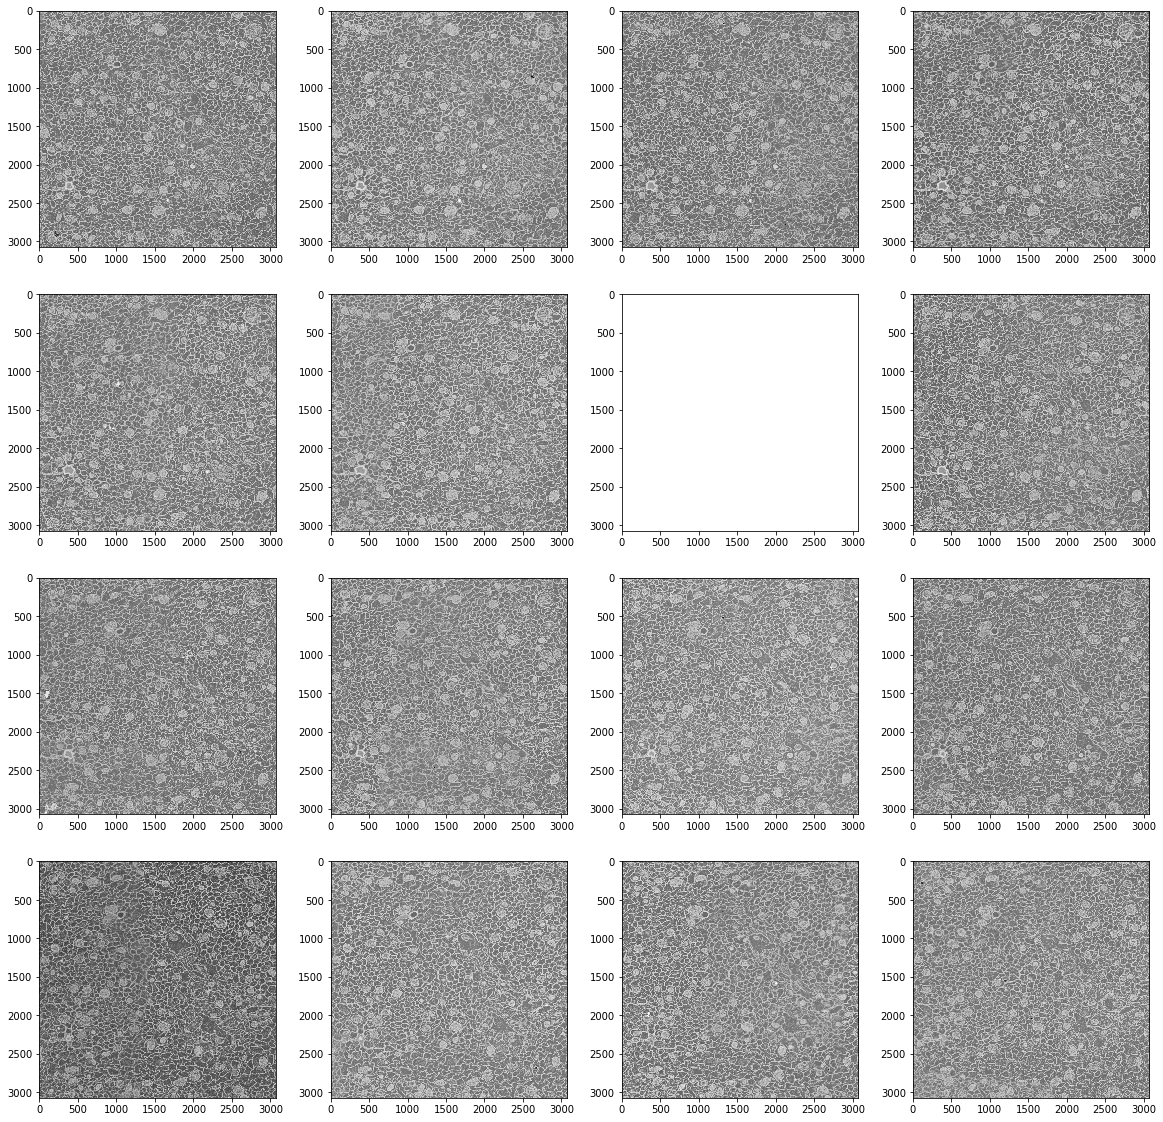

In [17]:
fig,ax = plt.subplots(4,4,figsize = (20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(rawA[0+4*i+j],cmap=cm.Greys)

In [18]:
cleftsA.shape

(125, 1250, 1250)

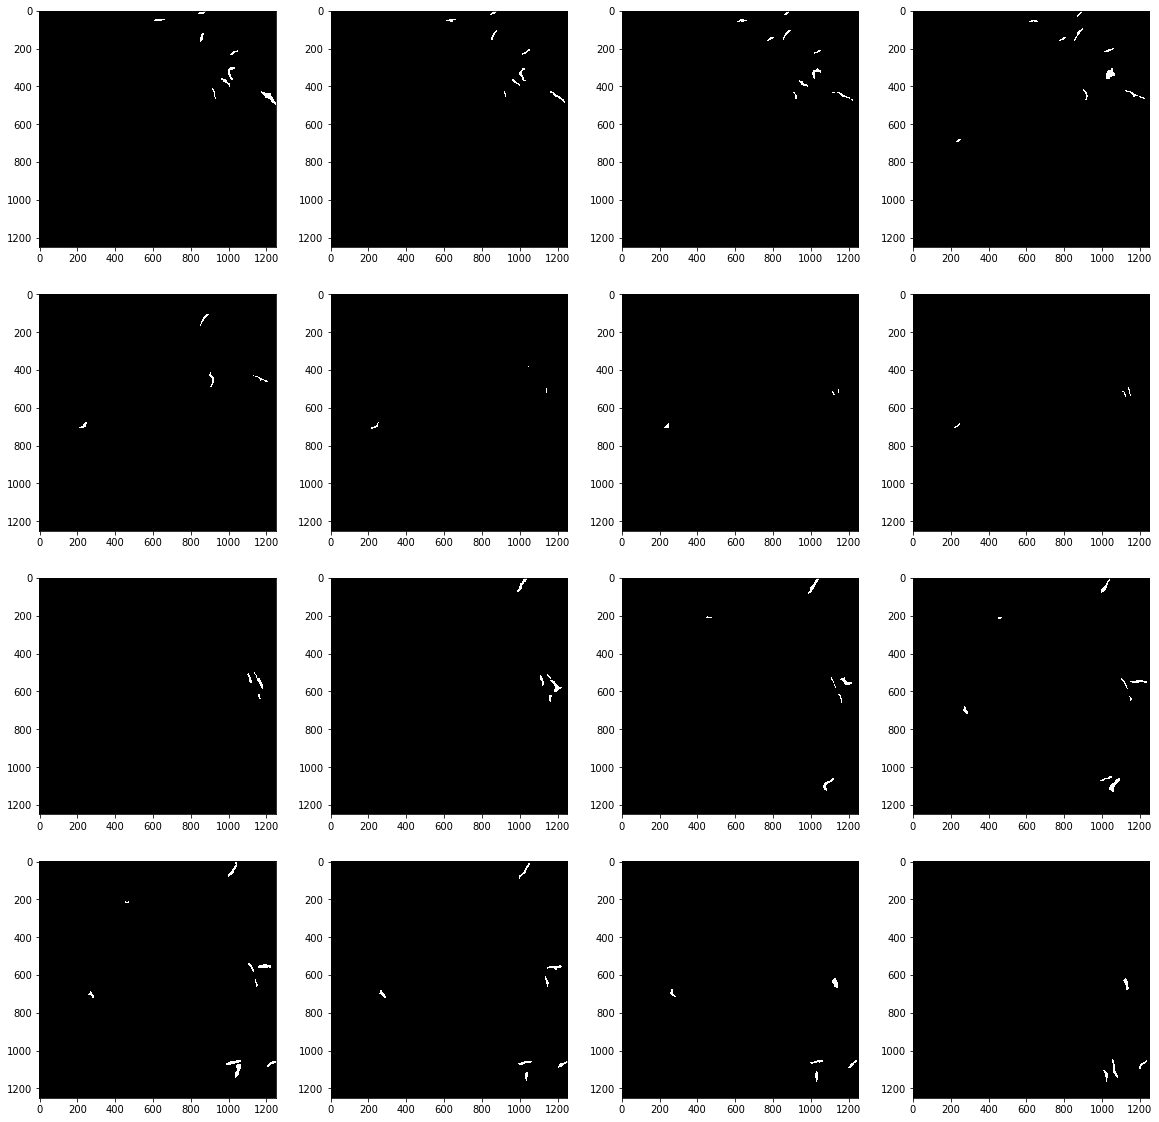

In [19]:
fig,ax = plt.subplots(4,4,figsize = (20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(cleftsA[0+4*i+j],cmap=cm.Greys)

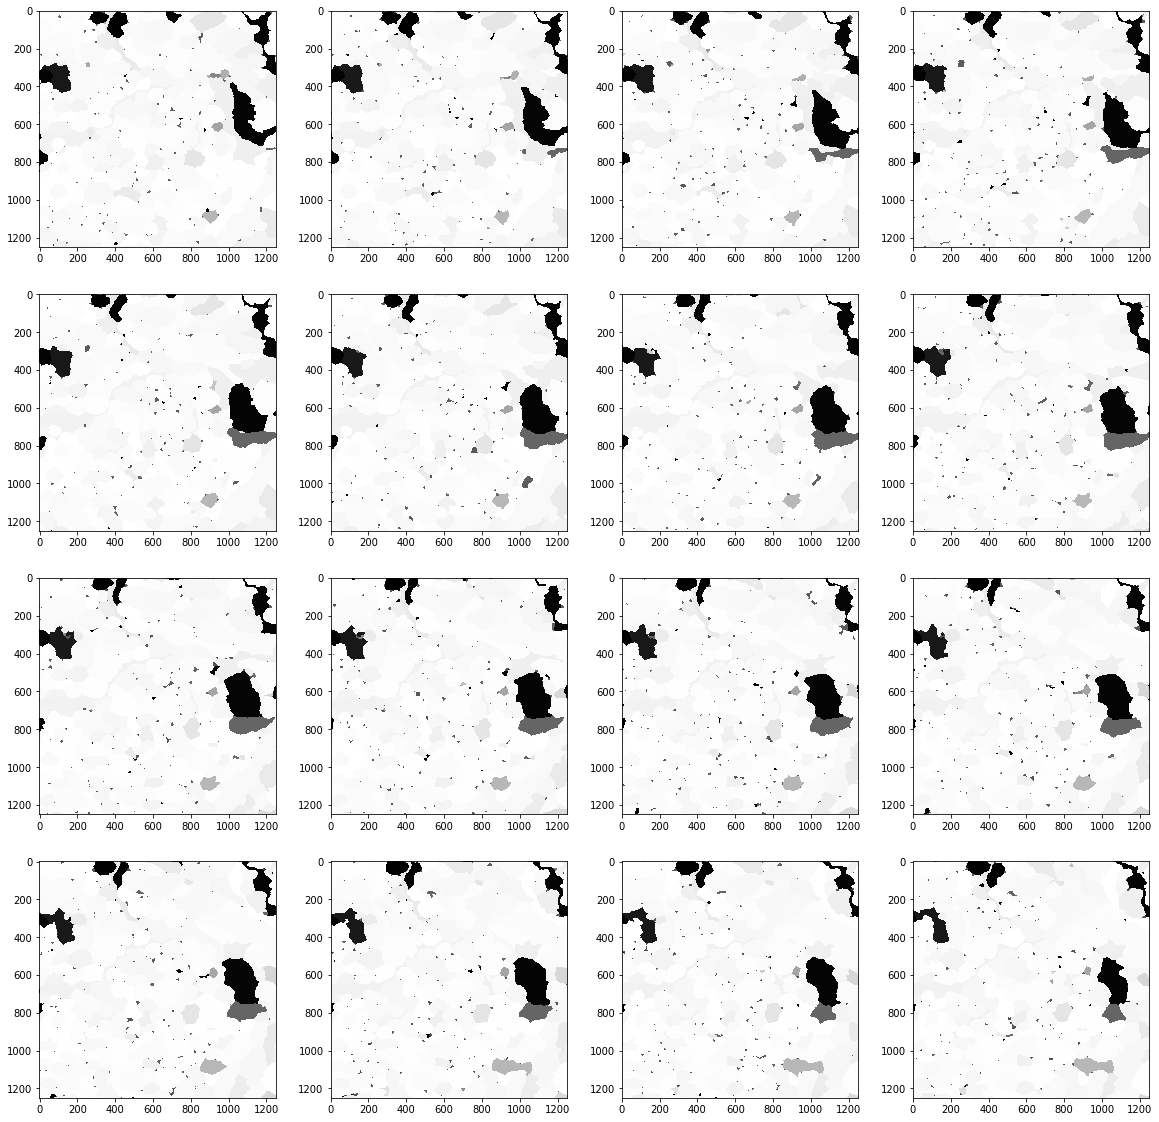

In [37]:
fig,ax = plt.subplots(4,4,figsize = (20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(neuronidA[0+4*i+j],cmap=cm.Greys)

### keys

In [2]:
with h5py.File('data/public/sample_A_padded_20160501.hdf') as f:
    print (list(f['annotations'].keys()))

NameError: name 'h5py' is not defined

In [43]:
with h5py.File('data/public/sample_A_padded_20160501.hdf') as f:
    annoidsA = f['annotations/ids'][:]
    locationA = f['annotations/locations'][:]
    presynapsesiteA = f['annotations/presynaptic_site/partners'][:]
    targetidA = f['annotations/comments/target_ids'][:]
    commentsA = f['annotations/comments/comments'][:]
    #print (list(f['annotations/presynaptic_site']))

In [27]:
annoidsA.shape[0]

432

In [63]:
targetidA

array([165, 167, 185, 191, 347, 389, 403, 405, 409, 425, 450, 468, 484,
       524, 568, 574, 576], dtype=uint64)

In [65]:
commentsA

array(['unsure', 'unsure', 'unsure', 'unsure', 'unsure', 'unsure',
       'unsure', 'unsure', 'unsure', 'unsure', 'unsure', 'unsure',
       'unsure', 'unsure', 'unsure', 'unsure', 'unsure'], dtype=object)

In [1]:
presynapsesiteA

NameError: name 'presynapsesiteA' is not defined

In [60]:
np.sum(presynapsesiteA -annoidsA.reshape(-1,2))

0

In [46]:
locationA[np.argsort(locationA[:,0])]/40

array([[  0.       ,  45.82115  ,  94.33835  ],
       [  0.       ,  44.839226 ,  90.874825 ],
       [  0.       ,  42.59788  ,  93.76875  ],
       ...,
       [119.       ,  93.36052  ,  99.39958  ],
       [120.       ,   3.7718124, 112.94265  ],
       [120.       ,   5.2691617, 117.2177   ]], dtype=float32)

In [45]:
locationA.shape

(432, 3)

In [36]:
np.unique(locationA[:,0],return_counts=True)

(array([   0.,   40.,   80.,  120.,  160.,  200.,  320.,  360.,  400.,
         440.,  480.,  520.,  560.,  600.,  640.,  680.,  720.,  800.,
         840.,  920.,  960., 1000., 1080., 1120., 1160., 1200., 1280.,
        1360., 1400., 1440., 1520., 1560., 1640., 1720., 1760., 1800.,
        1840., 1880., 1920., 1960., 2000., 2040., 2080., 2120., 2160.,
        2200., 2240., 2280., 2320., 2360., 2400., 2480., 2520., 2560.,
        2600., 2640., 2680., 2760., 2800., 2880., 2960., 3040., 3080.,
        3120., 3160., 3240., 3320., 3360., 3400., 3440., 3480., 3520.,
        3560., 3640., 3680., 3720., 3760., 3840., 3880., 3920., 4040.,
        4080., 4120., 4200., 4240., 4320., 4360., 4400., 4440., 4480.,
        4520., 4600., 4640., 4680., 4720., 4760., 4800.], dtype=float32),
 array([12, 10,  9,  7,  2,  4,  2,  2,  6, 10,  4,  4,  8,  1,  3,  5,  3,
         2,  2,  1,  8, 11, 10,  4,  2,  4, 12,  4,  2,  2,  1,  5,  2,  6,
         2,  2,  4,  9,  3,  2,  3,  1,  8,  7,  1,  7,  1,  2, 

In [66]:
np.sum(np.unique(locationA[:,0],return_counts=True)[1])

432

### raw & cleft

In [94]:
cleftsA.shape

(125, 1250, 1250)

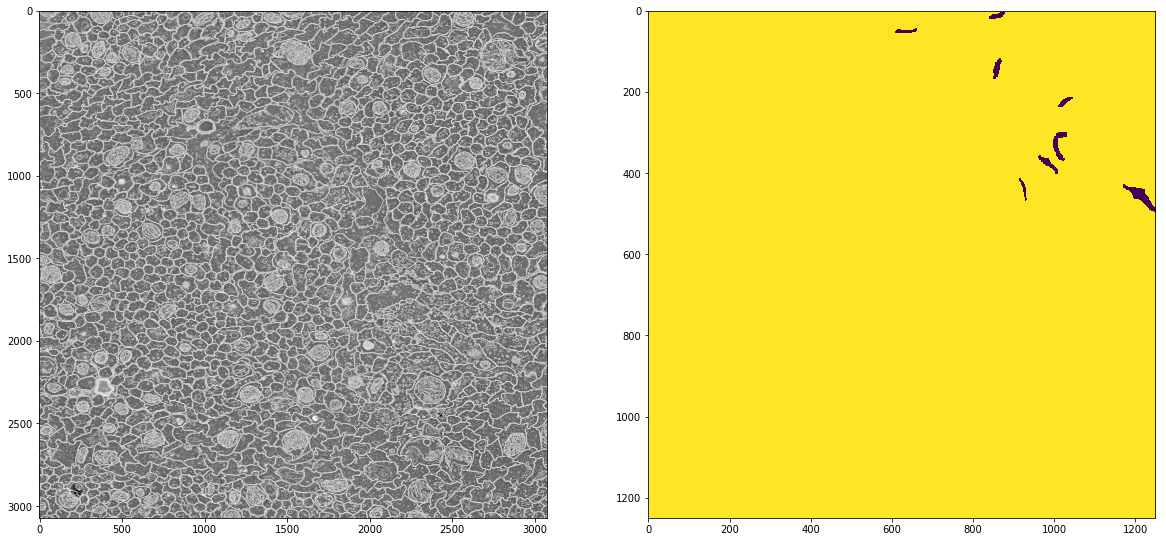

In [110]:
fig,ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(rawA[0],cmap=cm.Greys)
ax[1].imshow(cleftsA[0])

In [60]:
firstind = np.where(locationA[:,0]==40)[0]

In [63]:
locationA[firstind][:,1:]

array([[ 603.87885, 3519.4636 ],
       [ 517.9027 , 3338.4175 ],
       [ 798.4336 , 4115.9995 ],
       [ 910.2341 , 4220.714  ],
       [ 829.9267 , 4055.375  ],
       [ 996.8401 , 4053.0132 ],
       [1576.037  , 3872.06   ],
       [1502.1951 , 3973.107  ],
       [1702.0453 , 4790.7197 ],
       [1807.9001 , 4603.438  ]], dtype=float32)

### So what's the meaning of location?

In [78]:
np.fliplr(locationA[firstind][:,1:][:,0]/3)

ValueError: Input must be >= 2-d.

In [79]:
locationA[firstind][:,1:][:,0]/3

array([201.29295, 172.63423, 266.14453, 303.41135, 276.64224, 332.28003,
       525.34564, 500.7317 , 567.34845, 602.63336], dtype=float32)

In [80]:
np.flipud(locationA[firstind][:,1:][:,1]/3)

array([1534.4794, 1596.9066, 1324.369 , 1290.6866, 1351.0044, 1351.7916,
       1406.9047, 1371.9999, 1112.8058, 1173.1545], dtype=float32)

In [81]:
locationA[firstind][:,1:][:,1]/3

array([1173.1545, 1112.8058, 1371.9999, 1406.9047, 1351.7916, 1351.0044,
       1290.6866, 1324.369 , 1596.9066, 1534.4794], dtype=float32)

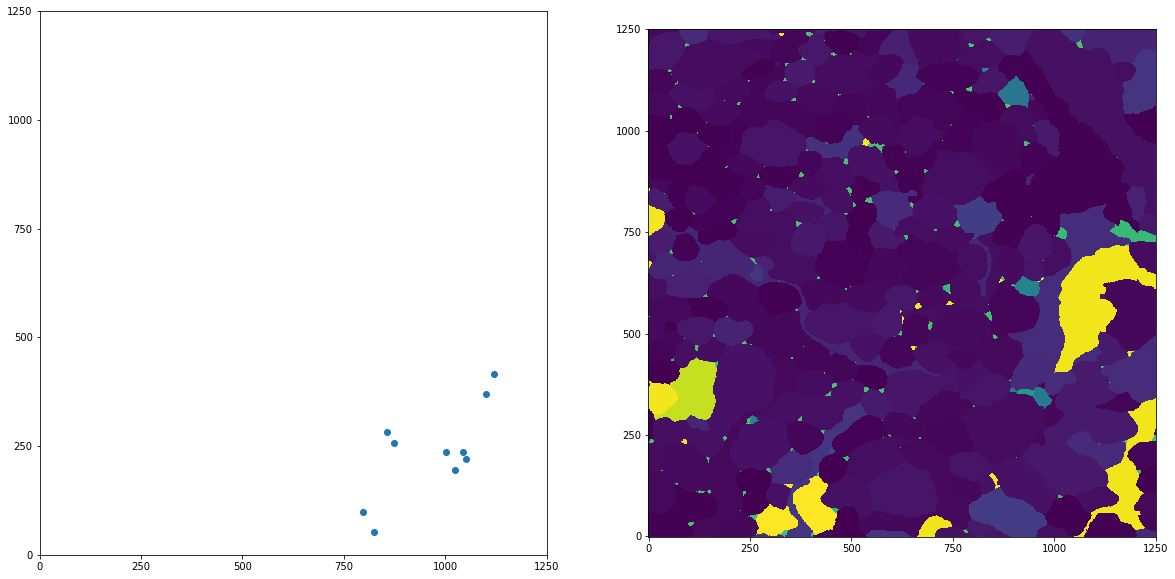

In [98]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].scatter(1250 - locationA[firstind][:,1:][:,0]/4,1250 - locationA[firstind][:,1:][:,1]/4)
ax[0].set_xticks(np.arange(0,1500,250))
#ax[0].set_yticks(np.arange(1250,0,-200))
ax[0].set_yticks(np.arange(0,1500,250))
#ax[1].imshow(cleftsA[1],origin='lower')
ax[1].imshow(neuronidA[1],origin='lower')
ax[1].imshow(neuronidA[1],origin='lower')
ax[1].set_xticks(np.arange(0,1500,250))
ax[1].set_yticks(np.arange(0,1500,250))

In [108]:
np.reshape(np.ones(10),[5,2])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

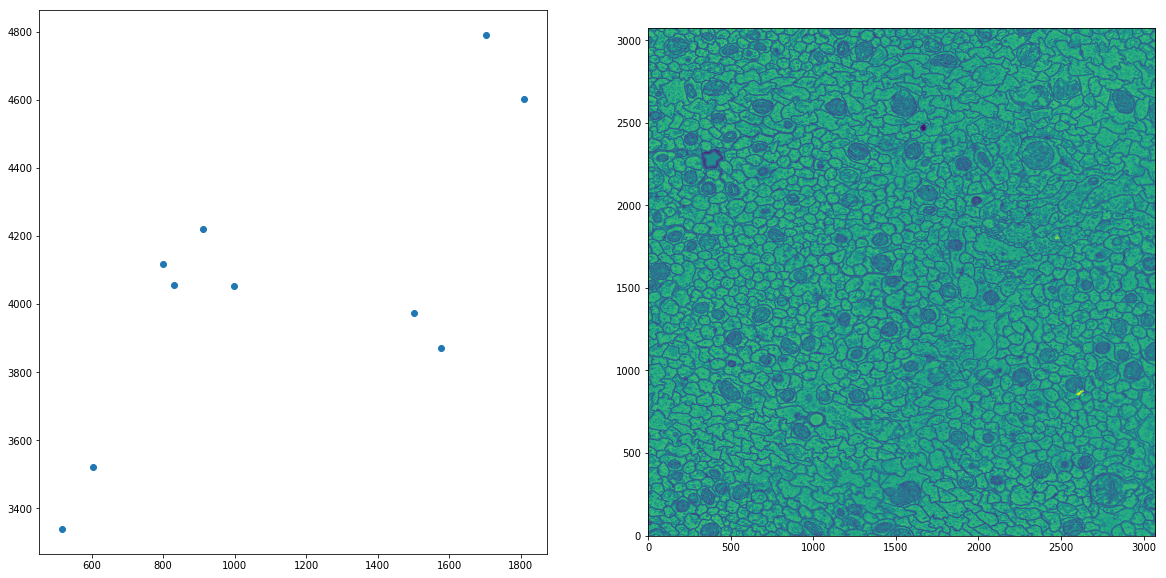

In [89]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].scatter(locationA[firstind][:,1:][:,0],locationA[firstind][:,1:][:,1])
#ax[0].set_xticks(np.arange(0,1250,200))
#ax[0].set_yticks(np.arange(1250,0,-200))
#ax[0].set_yticks(np.arange(0,1250,200))
ax[1].imshow(rawA[1],origin='lower')

In [52]:
presynapsesiteA

4962.137

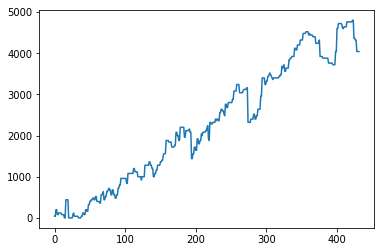

In [56]:
plt.plot(locationA[:,0])

(array([ 8., 11.,  8.,  6.,  3., 11., 12., 22.,  7., 13., 12., 14., 19.,
        12.,  9.,  7., 11., 13.,  7.,  4.,  6., 11., 15., 13.,  8.,  7.,
         8.,  8., 15.,  3.,  3.,  0.,  0.,  0.,  3.,  3.,  0.,  2., 11.,
         7.,  8.,  9.,  3.,  9., 22., 20., 13.,  9.,  4.,  3.]),
 array([1.40157497e+00, 3.36869688e+01, 6.59723626e+01, 9.82577564e+01,
        1.30543150e+02, 1.62828544e+02, 1.95113938e+02, 2.27399332e+02,
        2.59684725e+02, 2.91970119e+02, 3.24255513e+02, 3.56540907e+02,
        3.88826300e+02, 4.21111694e+02, 4.53397088e+02, 4.85682482e+02,
        5.17967876e+02, 5.50253269e+02, 5.82538663e+02, 6.14824057e+02,
        6.47109451e+02, 6.79394845e+02, 7.11680238e+02, 7.43965632e+02,
        7.76251026e+02, 8.08536420e+02, 8.40821814e+02, 8.73107207e+02,
        9.05392601e+02, 9.37677995e+02, 9.69963389e+02, 1.00224878e+03,
        1.03453418e+03, 1.06681957e+03, 1.09910496e+03, 1.13139036e+03,
        1.16367575e+03, 1.19596115e+03, 1.22824654e+03, 1.26053193e+

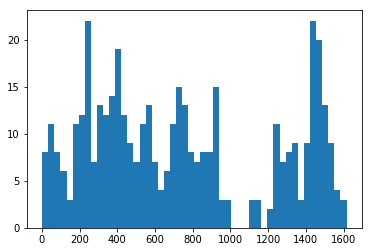

In [54]:
plt.hist(locationA[:,1]/3,bins=50)

# donglai dataset

In [80]:
print (img_A.shape)
print (mask_A.shape)

(153, 1842, 1727)
(153, 1842, 1727)


### raw 

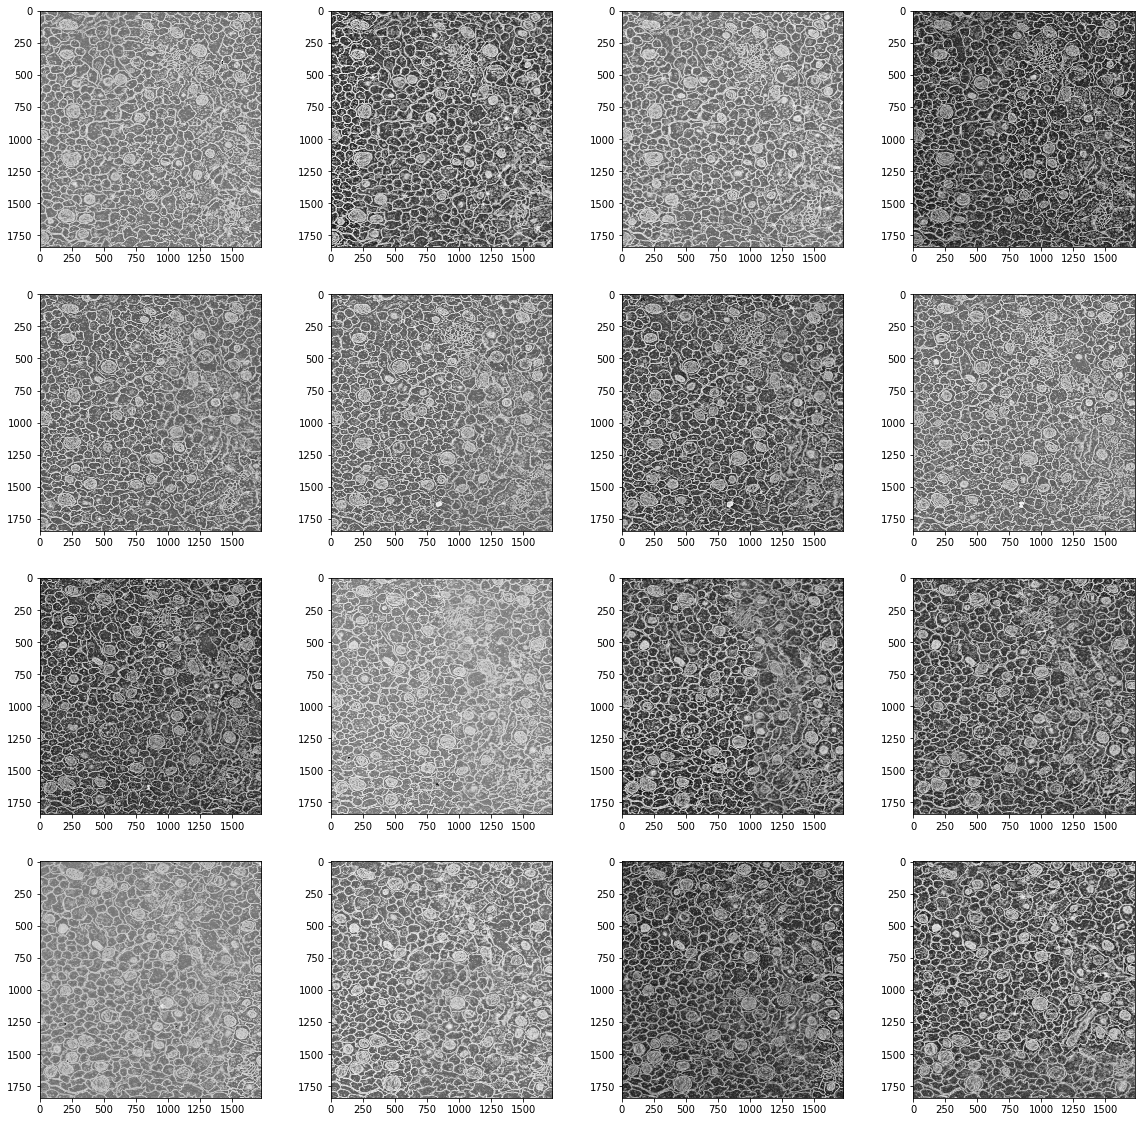

In [105]:
fig,ax = plt.subplots(4,4,figsize = (20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(img_A[0+4*i+j],cmap=cm.Greys)

### cleft:

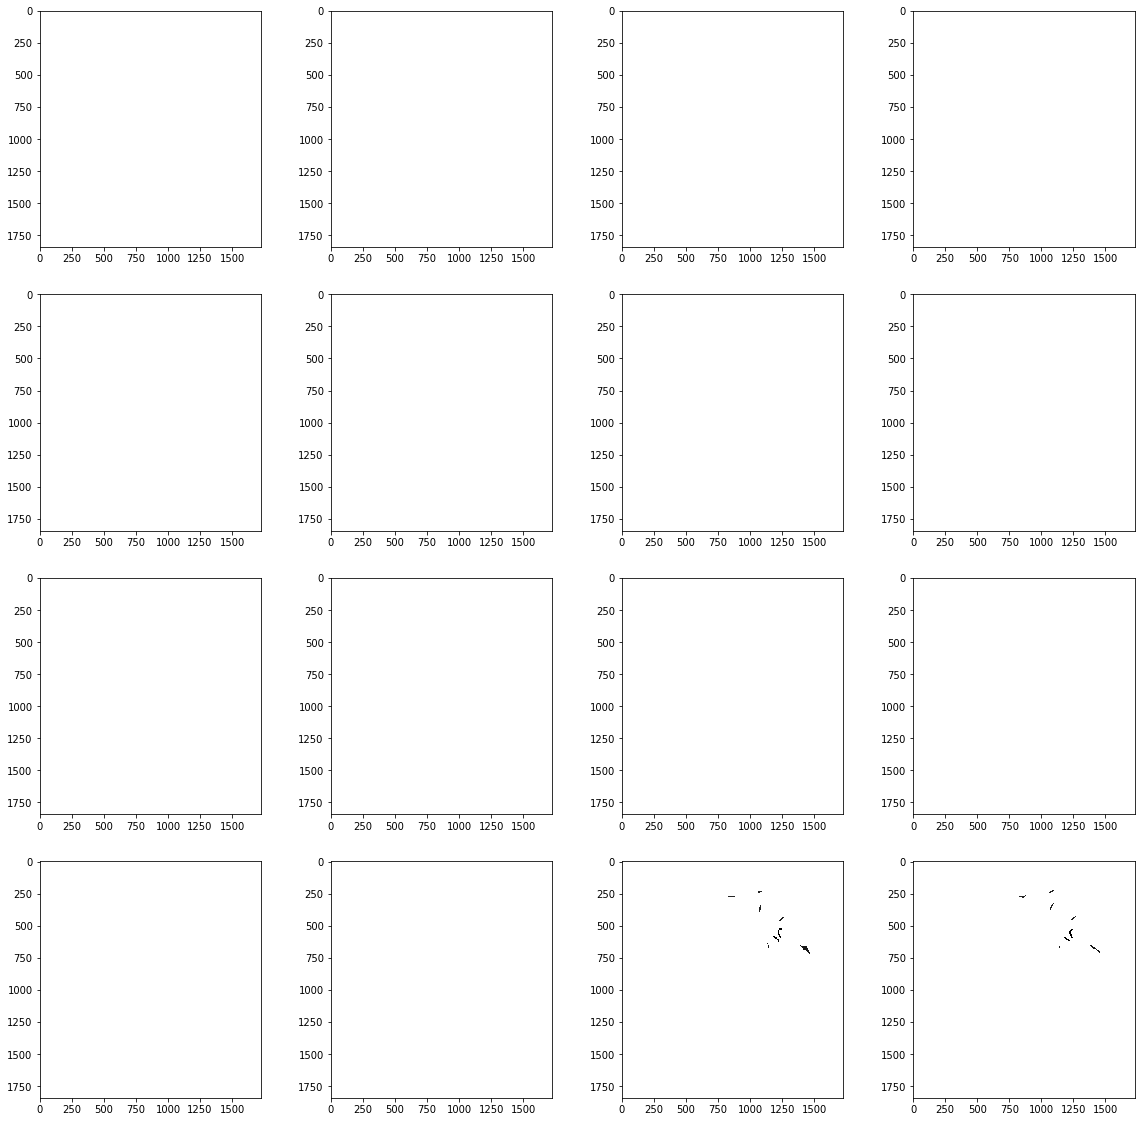

In [81]:
num=0
fig,ax = plt.subplots(4,4,figsize = (20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(mask_A[num+4*i+j],cmap=cm.Greys)

### raw & cleft

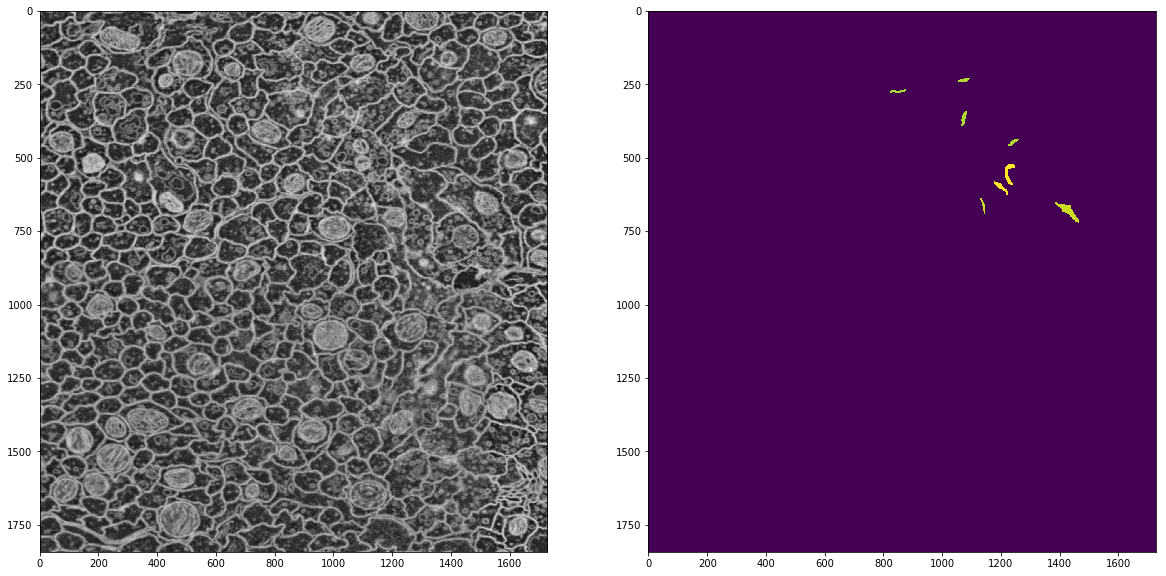

In [111]:
fig,ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(img_A[14],cmap=cm.Greys)
ax[1].imshow(mask_A[14])

# compare public & donglai cleft:

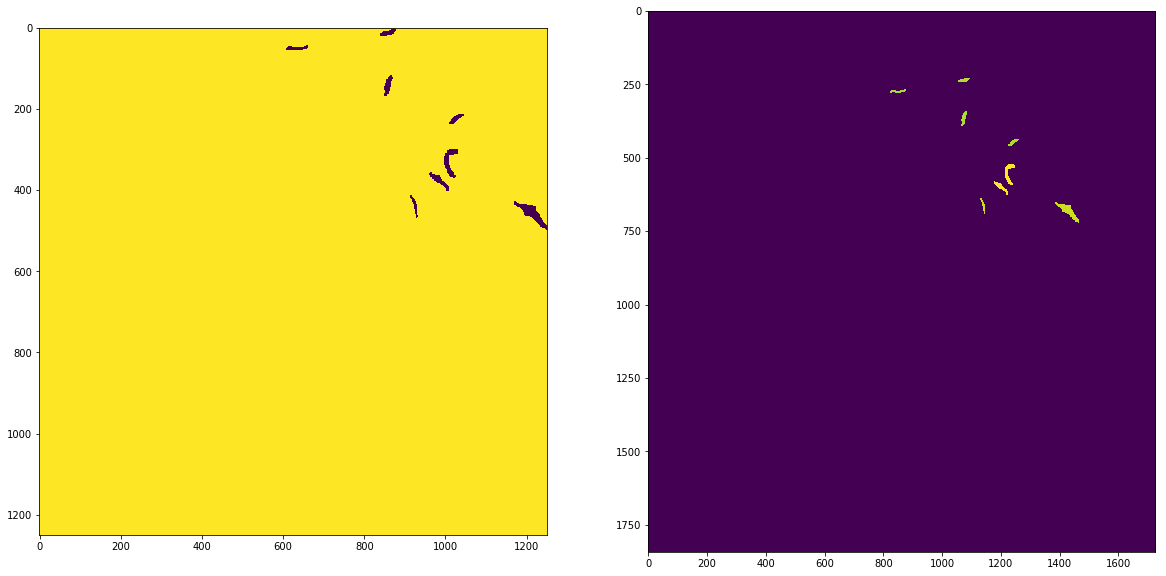

In [22]:
fig,ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(cleftsA[0])
ax[1].imshow(mask_A[14])

In [23]:
np.unique(mask_A[14],return_counts=True)

(array([  0, 746, 754, 755, 756, 781, 788, 857, 858], dtype=uint16),
 array([3175399,     417,     602,     401,     422,     339,    1753,
            708,    1093]))

In [28]:
color = np.unique(cleftsA,return_counts=True)

In [31]:
color[0].shape

(124,)

In [77]:
print (rawA.shape)
print (cleftsA.shape)

(200, 3072, 3072)
(125, 1250, 1250)
